In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import tree
data_train  = pd.read_csv('../data/q1/train.csv')
data_test = pd.read_csv('../data/q1/test.csv')
data_validation = pd.read_csv('../data/q1/validation.csv')
categorical_cols = data_train.select_dtypes(include='object').columns.tolist()
data_train = pd.get_dummies(data_train, columns=categorical_cols ,  dtype=int)
data_validation = pd.get_dummies(data_validation, columns=categorical_cols ,  dtype=int)
data_test = pd.get_dummies(data_test, columns=categorical_cols ,  dtype=int)
data_test = data_test.reindex(columns=data_train.columns, fill_value=0)
data_validation = data_validation.reindex(columns=data_train.columns, fill_value=0)

In [4]:
max_depth = [15,25,35,45]
train_acc = []
test_acc = []
val_acc = []
for dpt in max_depth: 
    clf  = tree.DecisionTreeClassifier(criterion ='entropy', max_depth = dpt )
    clf.fit(data_train.drop('result', axis=1), data_train['result'])
    print(f"Train-Accuracy, Validation-Accuracy and Test-Accuracy for depth {dpt} : {clf.score(data_train.drop('result', axis=1), data_train['result'])*100:.2f}%, {clf.score(data_validation.drop('result', axis=1), data_validation['result'])*100:.2f}%, {clf.score(data_test.drop('result', axis=1), data_test['result'])*100:.2f}%")
    print()
    # print('-----------------------------------')
    train_acc.append(clf.score(data_train.drop('result', axis=1), data_train['result'])*100)
    test_acc.append(clf.score(data_test.drop('result', axis=1), data_test['result'])*100)
    val_acc.append(clf.score(data_validation.drop('result', axis=1), data_validation['result'])*100)

Train-Accuracy, Validation-Accuracy and Test-Accuracy for depth 15 : 72.57%, 59.20%, 59.15%

Train-Accuracy, Validation-Accuracy and Test-Accuracy for depth 25 : 86.25%, 60.11%, 61.53%

Train-Accuracy, Validation-Accuracy and Test-Accuracy for depth 35 : 96.01%, 60.80%, 60.70%

Train-Accuracy, Validation-Accuracy and Test-Accuracy for depth 45 : 99.57%, 60.69%, 61.22%



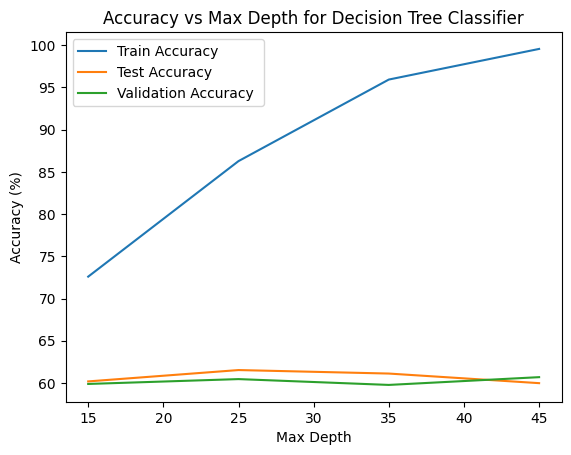

In [13]:
plt.plot(max_depth , train_acc , label = "Train Accuracy ")
plt.plot(max_depth , test_acc , label = "Test Accuracy ")
plt.plot(max_depth , val_acc , label = "Validation Accuracy ")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Max Depth for Decision Tree Classifier")
plt.legend()
plt.show()

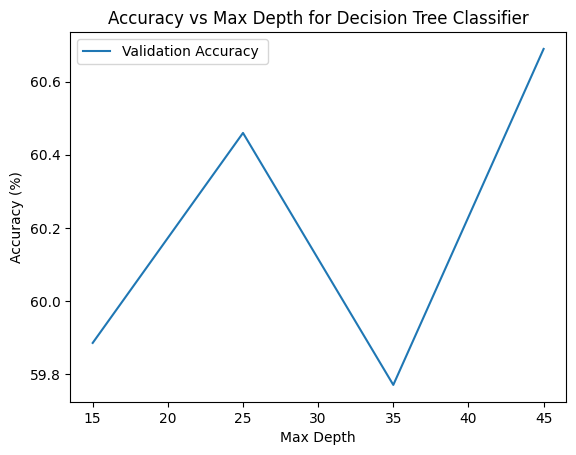

In [14]:
plt.plot(max_depth , val_acc , label = "Validation Accuracy ")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Max Depth for Decision Tree Classifier")
plt.legend()
plt.show()

Experiment with pruning 

In [3]:
ccp_alpha_values = [0.0, 0.0001, 0.0003, 0.0005]
train_acc = []
test_acc = []
val_acc = []
for ccp  in ccp_alpha_values: 
    clf  = tree.DecisionTreeClassifier(criterion ='entropy',ccp_alpha=ccp )
    clf.fit(data_train.drop('result', axis=1), data_train['result'])
    train_acc.append(clf.score(data_train.drop('result', axis=1), data_train['result'])*100)
    test_acc.append(clf.score(data_test.drop('result', axis=1), data_test['result'])*100)
    val_acc.append(clf.score(data_validation.drop('result', axis=1), data_validation['result'])*100)
    print(f"Train-Accuracy, Validation-Accuracy and Test-Accuracy for ccp_alpha {ccp} : {clf.score(data_train.drop('result', axis=1), data_train['result'])*100:.2f}%, {clf.score(data_validation.drop('result', axis=1), data_validation['result'])*100:.2f}%, {clf.score(data_test.drop('result', axis=1), data_test['result'])*100:.2f}%")

Train-Accuracy, Validation-Accuracy and Test-Accuracy for ccp_alpha 0.0 : 100.00%, 61.15%, 60.91%
Train-Accuracy, Validation-Accuracy and Test-Accuracy for ccp_alpha 0.0001 : 100.00%, 61.72%, 60.50%
Train-Accuracy, Validation-Accuracy and Test-Accuracy for ccp_alpha 0.0003 : 97.62%, 59.08%, 62.25%
Train-Accuracy, Validation-Accuracy and Test-Accuracy for ccp_alpha 0.0005 : 85.15%, 62.41%, 61.94%


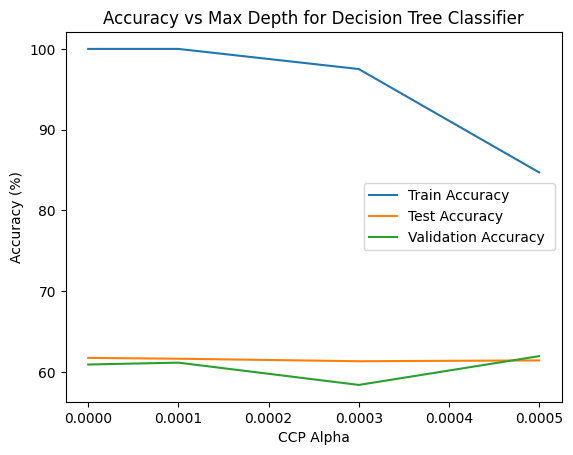

In [18]:
plt.plot(ccp_alpha_values , train_acc , label = "Train Accuracy ")
plt.plot(ccp_alpha_values , test_acc , label = "Test Accuracy ")
plt.plot(ccp_alpha_values , val_acc , label = "Validation Accuracy ")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Max Depth for Decision Tree Classifier")
plt.legend()
plt.show()

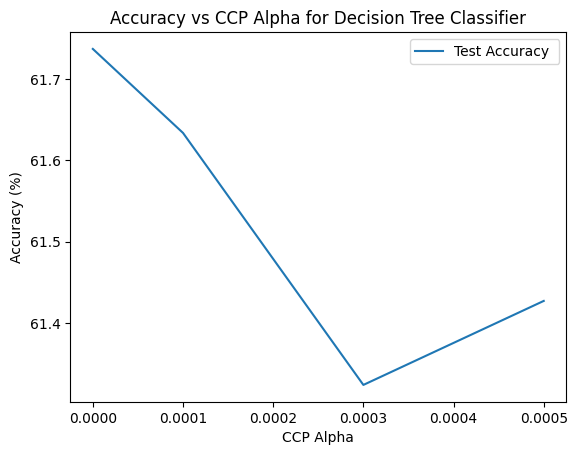

In [22]:
plt.plot(ccp_alpha_values , test_acc , label = "Test Accuracy ")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs CCP Alpha for Decision Tree Classifier")
plt.legend()
plt.show()